In [1]:
# url短縮サービスのbitlyがurl短縮を行った状況についてのデータセット
path = 'usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [2]:
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [3]:
records[0]['tz']

'America/New_York'

In [4]:
# tzのリストを作る
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [5]:
# 集計メソッドを定義してタイムゾーンを集計したい
# ライブラリでも集計できるがとりあえず自前で集計メソッド書いてみる
def get_counts(sequence):
    counts = {}
    for x in counts:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [6]:
from collections import defaultdict


# ライブラリを使って集計メソッドを書いてみる
def get_counts2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [7]:
counts = get_counts2(time_zones)
counts['America/New_York']

1251

In [8]:
len(time_zones)

3440

In [9]:
# タイムゾーンで名寄せして集計して上位10個を返す
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [10]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [11]:
from collections import Counter

# Counterライブラリを使うことで楽に順位が作れる
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [12]:
# Series: narrayにラベルがついたもの
# DataFrame: Seriesを束ねたもの
from pandas import DataFrame, Series
import pandas as pd
import numpy as np


frame = DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [13]:
frame['tz'[:10]].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [14]:
# DataFrameからタイムゾーンのSeriesを取り出す
# Seriesはvalue_countsという名寄せ集計メソッドがある
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [15]:
# naはMissingで埋める
clean_tz = frame['tz'].fillna('Missing')
# から文字はUnknownで埋める
clean_tz[clean_tz == ''] = 'Unknown'
# 改めて集計する
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

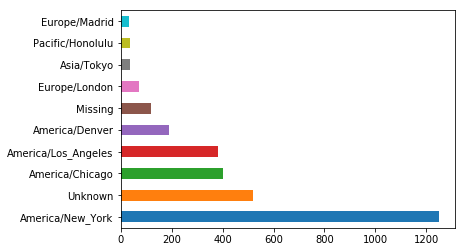

In [16]:
%matplotlib inline
# 集計結果をプロットしてみる
tz_counts[:10].plot(kind='barh', rot=0)

In [17]:
# フィールドaにはアクセスしてきたアプリケーションが格納されてる
frame['a'][1]

'GoogleMaps/RochesterNY'

In [18]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [19]:
# naになってるデータは取り外し、# アクセスしてきたアプリケーションのユーザーエージェントだけ抽出
results = Series([x.split()[0] for x in frame.a.dropna()])

In [20]:
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [21]:
# アクセスしてくるアプリケーションを集計
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [22]:
# データフレームの中で、フィールドaがnullでないものについてだけ抽出
cframe = frame[frame.a.notnull()]
# windowsユーザーかそうでないかを識別したい
# フィールドaがwindowsという文字列を含んでいるものとそうでないもの判定にnumpyのwhereメソッドを使用
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
pd.Series(operating_system).head()

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
dtype: object

In [23]:
# cframeレコードをタイムゾーンとwindowsユーザー判定でグルーピング
by_tz_os = cframe.groupby(['tz', operating_system])
# groupbyでグルーピングされたレコードはsizeで組ごとに集計できる
# さらにタイムゾーンとwindowsユーザー判定の集計で階層化されたインデックスをunstackで表形式にする
# stack: 列から行へのピボット
# unstack: 行から列へのピボット
# 表形式にすることでnaが発生するので0埋めする
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head(10)

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [24]:
# タイムゾーン/windownユーザー判定の集計結果データフレームをタイムゾーンで集計し、集計結果レコードから集計結果の昇順でのインデックスを返す
# 下の場合、Africa/Cairoは集計結果ではインデックス20の要素となる（21番目）
indexer = agg_counts.sum(1).argsort()
indexer.head(10)

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [25]:
agg_counts.take([1])

,Not Windows,Windows
tz,,
Africa/Cairo,0.0,3.0


In [26]:
# Seriesであるindexerを使って、タイムゾーン/windownユーザー判定の集計結果データフレームからタイムゾーンの集計結果順でソートされたデータフレームを抽出
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


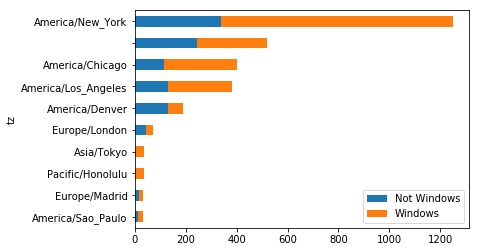

In [27]:
# タイムゾーン/windownユーザー判定の集計結果データフレームをプロット
count_subset.plot(kind='barh', stacked=True)

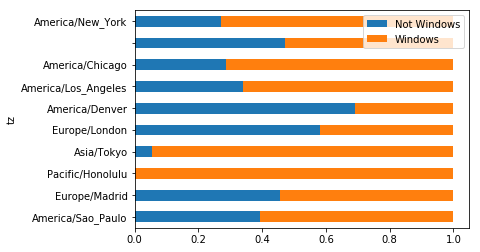

In [28]:
# 正規化する
# windows使用判定で合計した値でそれぞれのタイムゾーンのwindowsユーザー/非windowsユーザーの項目を割る
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)